In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autotime

%cd ..

/Users/rubenbroekx/Documents/Projects/edbscan
time: 1.46 ms (started: 2021-11-14 23:31:37 +01:00)


# Usage

This notebook shows the basic usage of the EDBSCAN algorithm.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from edbscan import EDBSCAN

time: 635 ms (started: 2021-11-14 23:31:37 +01:00)


In [3]:
# Load in the data
with open(Path.cwd() / 'examples/data.npy', 'rb') as f:
    data = np.load(f,allow_pickle=True)
    
with open(Path.cwd() / 'examples/y.npy', 'rb') as f:
    y = np.load(f,allow_pickle=True)

# Show the manually labeled samples
y

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, -1, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, -1, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, 0, None, None, None, None, None, None, None,
       None, None, None, None, None, 1, None, None, None, None, 2, None,
       None, None, None, None, None, None, None, None, 3, None, None,
       None, None, None, None, None, None, None, None, None, 

time: 4.89 ms (started: 2021-11-14 23:31:38 +01:00)


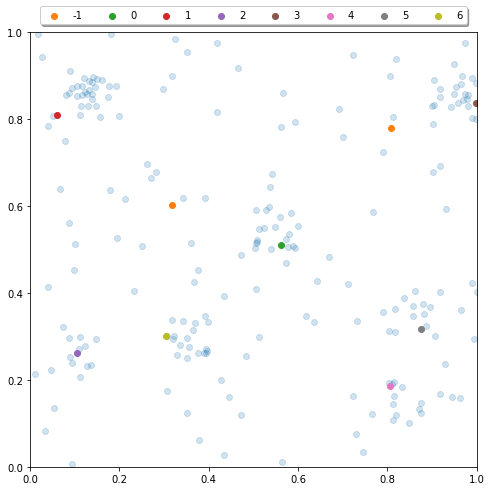

time: 215 ms (started: 2021-11-14 23:31:38 +01:00)


In [4]:
# Visualise the raw data (including the manually put labels)
plt.figure(figsize=(8,8))
for label in [None,] + list(range(-1,7)):
    plt.scatter(
        data[y == label,0],
        data[y == label,1],
        label=label,
        alpha=.2 if label == None else 1
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=8, fancybox=True, shadow=True)
plt.show()

In [5]:
# EDBSCAN
edbscan = EDBSCAN(eps=.1,min_samples=5)
edbscan.fit(X=data,y=y)
labels = edbscan.get_labels()
labels

array([-1,  2,  2,  4, -1, -1, -1,  3,  4,  3, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1,  0,  0,  5,  4, -1,  5,  4, -1,  2, -1, -1,  3, -1, -1,
       -1,  5,  0,  5,  1,  2, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,  5,
        0, -1,  4, -1, -1,  6, -1, -1, -1, -1, -1,  1, -1, -1,  2,  4, -1,
       -1,  6,  3, -1,  3, -1, -1, -1,  6, -1, -1, -1, -1, -1,  4,  1, -1,
       -1, -1,  4, -1,  0,  4,  3,  0, -1,  6, -1, -1, -1,  5,  5,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6])

time: 5.31 ms (started: 2021-11-14 23:31:38 +01:00)


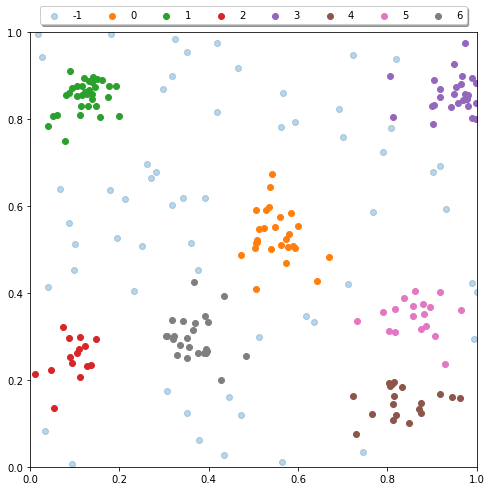

time: 186 ms (started: 2021-11-14 23:31:38 +01:00)


In [6]:
# Visualise the result
plt.figure(figsize=(8,8))
for cluster in sorted(set(labels)):
    plt.scatter(
        data[labels == cluster,0], 
        data[labels == cluster,1], 
        label=cluster,
        alpha=0.3 if cluster == -1 else 1
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=len(set(labels)), fancybox=True, shadow=True)
plt.show()